In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
print(df_train.Embarked.unique())
print(df_train.Sex.unique())

['S' 'C' 'Q' nan]
['male' 'female']


Text(0, 0.5, 'count')

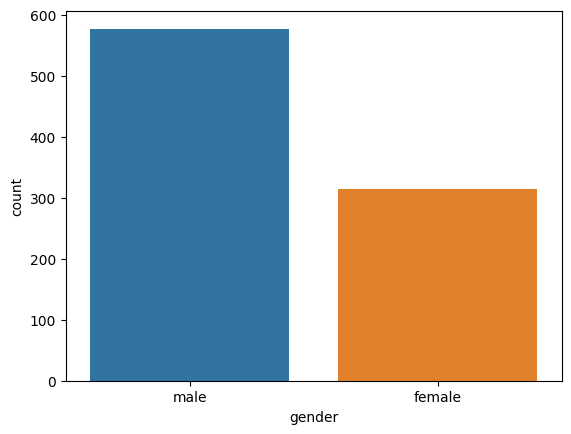

In [35]:
sns.countplot(df_train, x = 'Sex').set_xlabel('gender')
plt.ylabel("count")

survival rate women:  0.7420382165605095
survival rate men:  0.18890814558058924


Text(0, 0.5, 'survival rate')

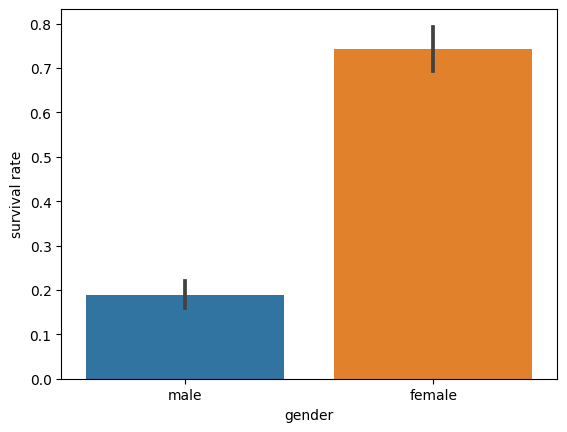

In [34]:
# survival rate of female
female = df_train.loc[df_train.Sex == 'female']
female = female['Survived']
survival_rate_female = sum(female)/len(female)
print('survival rate women: ', survival_rate_female)

# survival rate of male
male = df_train.loc[df_train.Sex == 'male']
male = male['Survived']
survival_rate_male = sum(male)/len(male)
print('survival rate men: ', survival_rate_male)

sns.barplot(data=df_train, x='Sex', y='Survived').set_xlabel('gender')
plt.ylabel("survival rate")

In [20]:
df_train.Pclass.unique()

array([3, 1, 2])

In [25]:
for i in range(1,4):
    PClass = df_train.loc[df_train.Pclass == i]['Survived']
    PClass_survival = sum(PClass)/len(PClass)
    print('Survival rate of ', i, ' class passengers: ', PClass_survival)

Survival rate of  1  class passengers:  0.6296296296296297
Survival rate of  2  class passengers:  0.47282608695652173
Survival rate of  3  class passengers:  0.24236252545824846


In [27]:
for i in range(1,4):
    PClass = df_train.loc[df_train.Pclass == i]['Survived']
    PClass_survival = sum(PClass)/len(PClass)
    print('Survival rate of ', i, ' class passengers: ', PClass_survival)

Survival rate of  1  class passengers:  0.6296296296296297
Survival rate of  2  class passengers:  0.47282608695652173
Survival rate of  3  class passengers:  0.24236252545824846


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_C,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [52]:
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# Data preparation
df_train['Sex'].replace('female', 0, inplace=True)
df_train['Sex'].replace('male', 1, inplace=True)
df_train.head()

/tmp/ipykernel_37/3443157397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Sex'].replace('female', 0, inplace=True)
/tmp/ipykernel_37/3443157397.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test['Sex'].replace('female', 0, inplace=True)
df_test['Sex'].replace('male', 1, inplace=True)
df_test.head()

/tmp/ipykernel_37/593264646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Sex'].replace('female', 0, inplace=True)
/tmp/ipykernel_37/593264646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_train['Embarked_Q']=df_train['Embarked'].replace('Q',1).replace('C',0).replace('S',0)
df_train['Embarked_C']=df_train['Embarked'].replace('Q',0).replace('C',1).replace('S',0)
df_train['Embarked_S']=df_train['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
df_train.fillna({'Embarked_Q':'0', 'Embarked_C':'0', 'Embarked_S':'0'}, inplace=True)
df_train.head()

/tmp/ipykernel_37/4228159946.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Embarked_Q']=df_train['Embarked'].replace('Q',1).replace('C',0).replace('S',0)
/tmp/ipykernel_37/4228159946.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Embarked_C']=df_train['Embarked'].replace('Q',0).replace('C',1).replace('S',0)
/tmp/ipykernel_37/4228159946.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_C,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


In [8]:
df_test['Embarked_Q']=df_test['Embarked'].replace('Q',1).replace('C',0).replace('S',0)
df_test['Embarked_C']=df_test['Embarked'].replace('Q',0).replace('C',1).replace('S',0)
df_test['Embarked_S']=df_test['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
df_test.fillna({'Embarked_Q':'0', 'Embarked_C':'0', 'Embarked_S':'0'}, inplace=True)
df_test.head()

/tmp/ipykernel_37/3596041259.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Embarked_Q']=df_test['Embarked'].replace('Q',1).replace('C',0).replace('S',0)
/tmp/ipykernel_37/3596041259.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Embarked_C']=df_test['Embarked'].replace('Q',0).replace('C',1).replace('S',0)
/tmp/ipykernel_37/3596041259.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obj

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_C,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [9]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Embarked_Q   891 non-null    object 
 13  Embarked_C   891 non-null    object 
 14  Embarked_S   891 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


/tmp/ipykernel_37/3286678193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Embarked_Q   418 non-null    int64  
 12  Embarked_C   418 non-null    int64  
 13  Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 45.8+ KB


In [11]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Embarked_Q   418 non-null    int64  
 12  Embarked_C   418 non-null    int64  
 13  Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 45.8+ KB


/tmp/ipykernel_37/2433006955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)


In [12]:
df_train = df_train.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    object 
 8   Embarked_C  891 non-null    object 
 9   Embarked_S  891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [13]:
df_test = df_test.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_Q  418 non-null    int64  
 7   Embarked_C  418 non-null    int64  
 8   Embarked_S  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [14]:
X_train =df_train.drop(columns = ['Survived'])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_C,Embarked_S
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [15]:
y_train = df_train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_Q  418 non-null    int64  
 7   Embarked_C  418 non-null    int64  
 8   Embarked_S  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [45]:
X_test = df_test
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_C,Embarked_S
0,3,1,0.334993,0,0,-0.497811,1,0,0
1,3,0,1.325530,1,0,-0.512660,0,0,1
2,2,1,2.514175,0,0,-0.464532,1,0,0
3,3,1,-0.259330,0,0,-0.482888,0,0,1
4,3,0,-0.655545,1,1,-0.417971,0,0,1


In [38]:
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
y_test = df_sub.drop(columns=['PassengerId'])
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [47]:
rows_to_drop = X_test[X_test['Fare'].isna()].index
X_test = X_test.drop(rows_to_drop)
y_test = y_test.drop(rows_to_drop)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [19]:
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])

In [48]:
X_test[['Age', 'Fare']] = scaler.fit_transform(X_test[['Age', 'Fare']])

In [49]:
SVM = SVC()
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       265
           1       0.93      0.94      0.93       152

    accuracy                           0.95       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.95      0.95      0.95       417



[Text(0.3452826722929249, 0.9791666666666666, 'Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.17962683347713546, 0.9375, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.0724762726488352, 0.8958333333333334, 'Age <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.055220017256255395, 0.8541666666666666, 'Fare <= 1.139\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04831751509922347, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.062122519413287315, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08973252804141502, 0.8541666666666666, 'Fare <= -0.067\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.07592752372735116, 0.8125, 'Fare <= -0.08\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.06902502157031924, 0.7708333333333334, 'Age <= 2.024\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.04831751509922347, 0.7291666666666666, 'SibSp <= 0.5\ngini = 0.14\nsamples = 66\nvalue

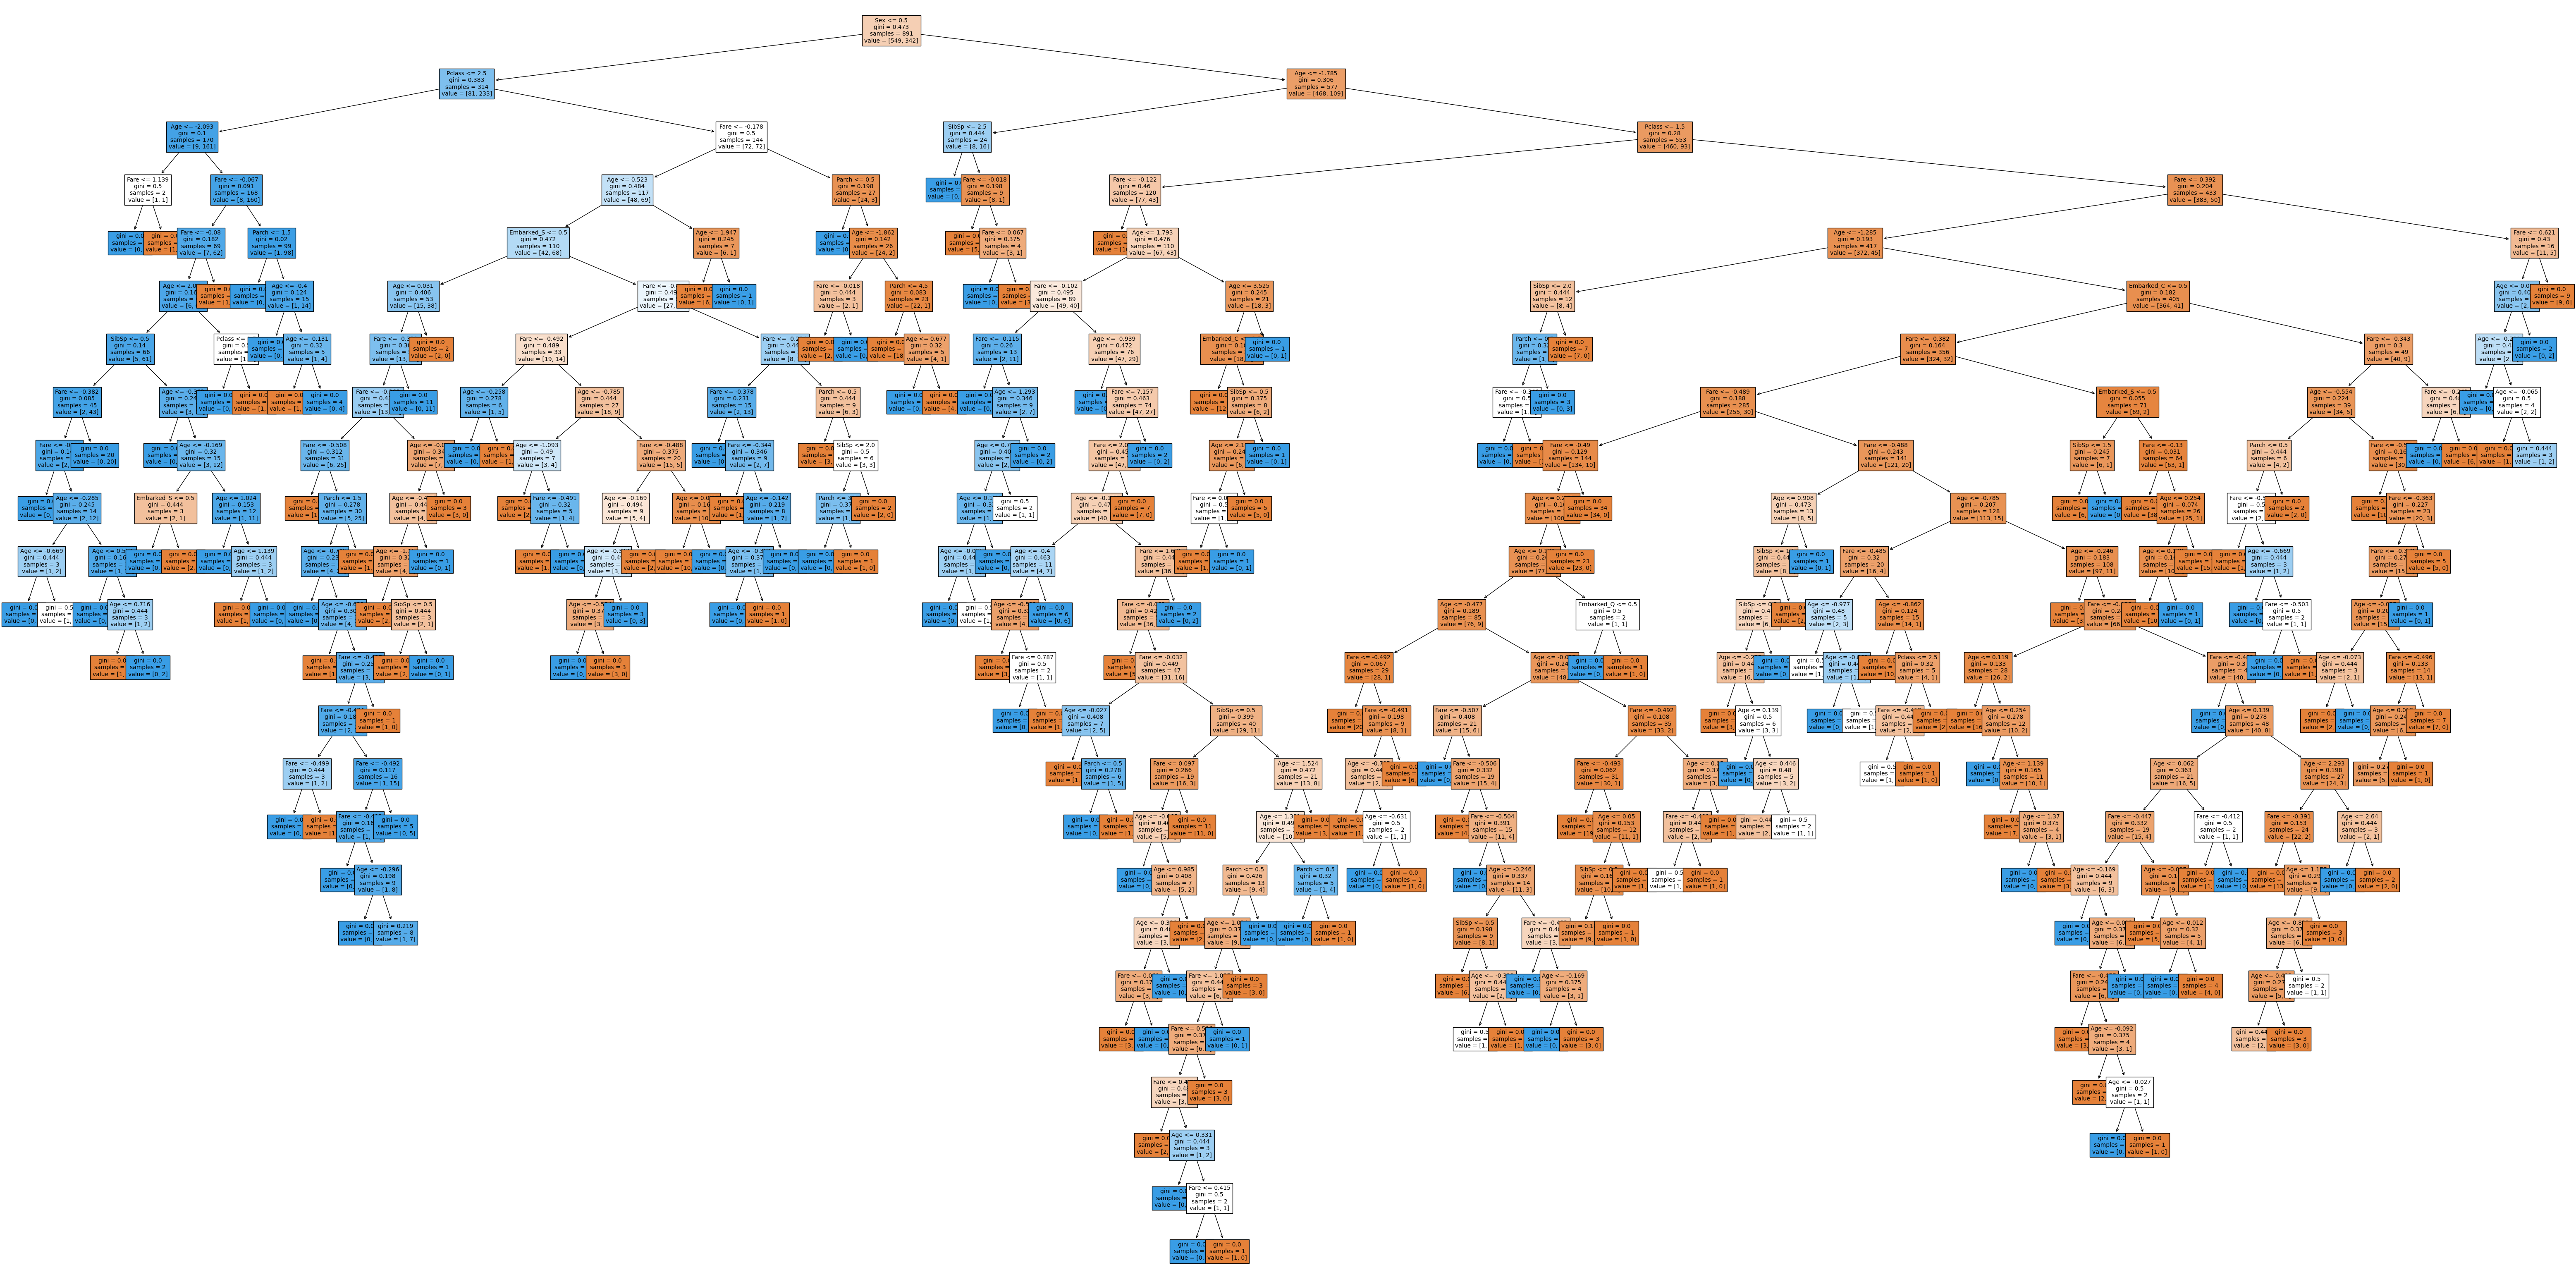

In [51]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(80, 40))
plot_tree(decision_tree, feature_names=list(X_test.columns), filled=True, fontsize=10, ax=ax)

In [52]:
pred_tree = decision_tree.predict(X_test)


In [53]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       265
           1       0.66      0.74      0.70       152

    accuracy                           0.77       417
   macro avg       0.75      0.76      0.75       417
weighted avg       0.77      0.77      0.77       417

